In [127]:
import numpy as np
import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv("./results/results_2d_to_1d_angle.csv", header=None)
df.rename(columns={
    0: "violated_constraints",
    1: "total_constraints",
    2:"angle"
}, inplace=True)
df.head()
df["angle"] /= np.pi

0.35641306330961503


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[  6900  58800 202575 485100   7800   8775   9828  10962  12180  13485
  14880  16368  17952  19635  21420  23310  25308  27417  29640  31980
  34440  37023  39732  42570  45540  48645  51888  55272  62475  66300
  70278  74412  78705  83160  87780]


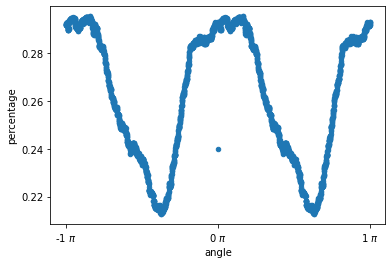

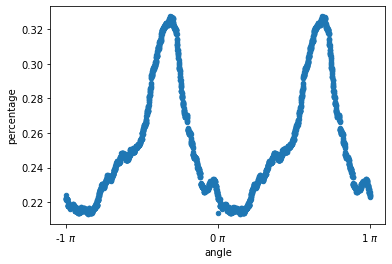

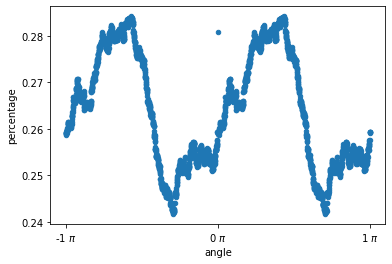

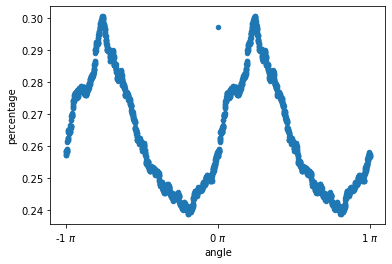

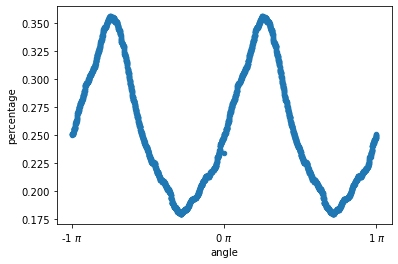

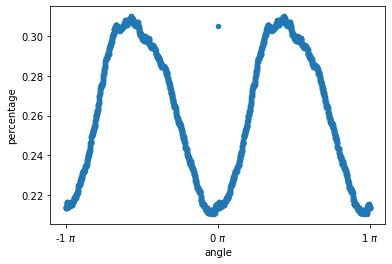

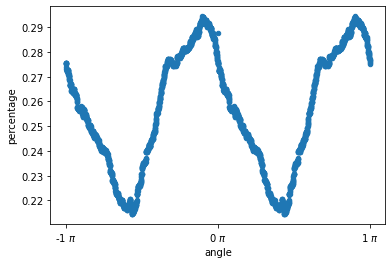

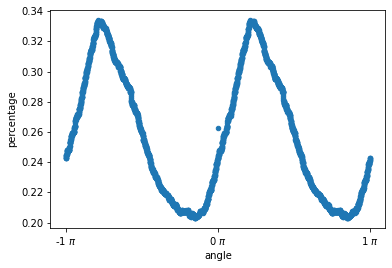

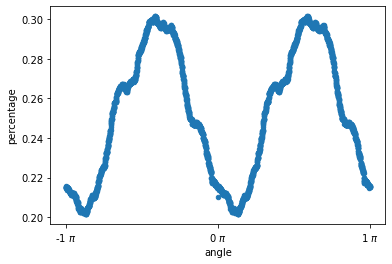

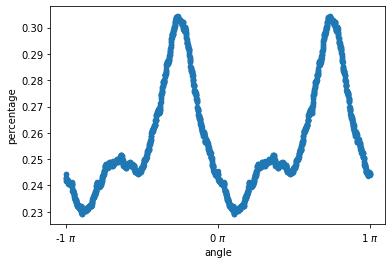

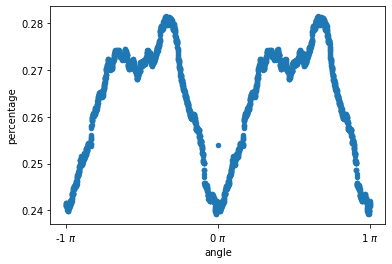

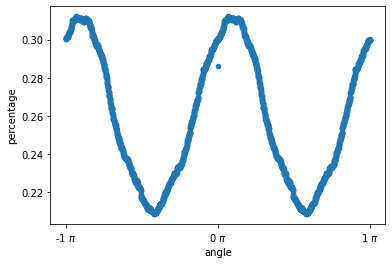

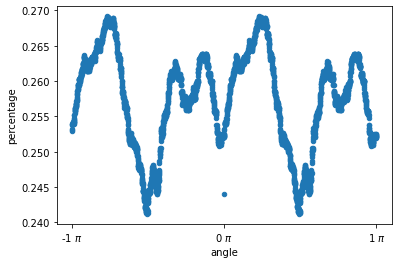

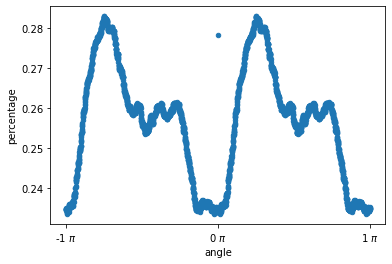

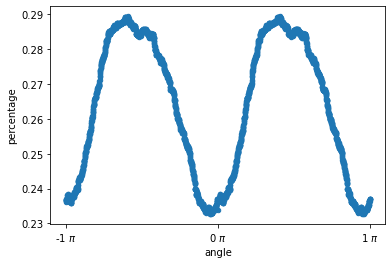

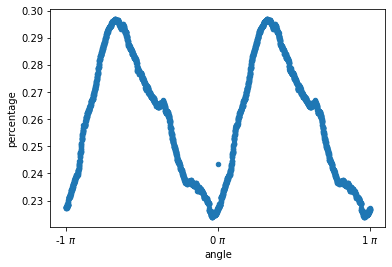

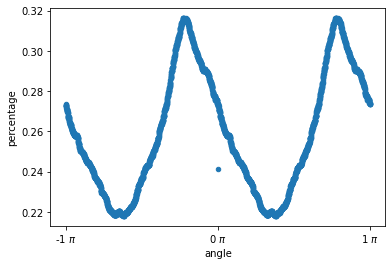

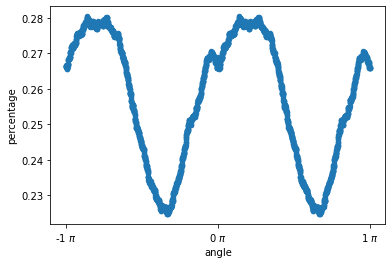

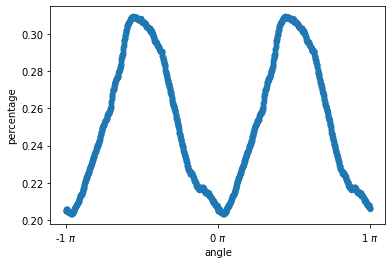

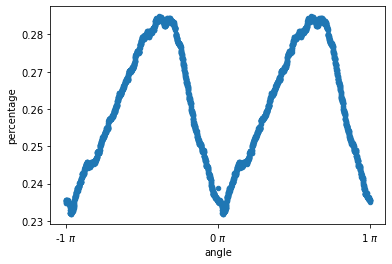

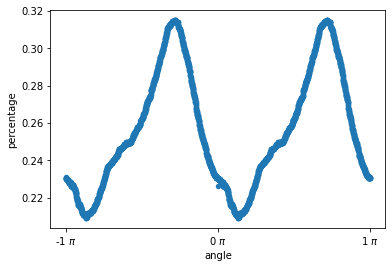

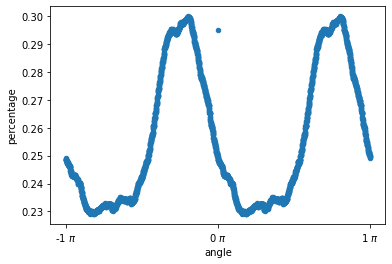

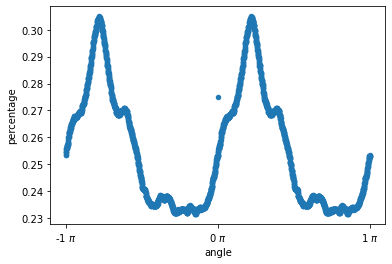

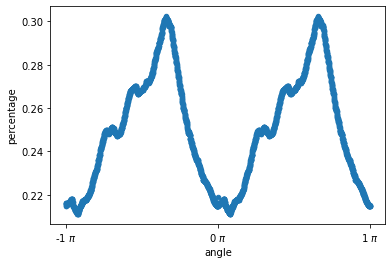

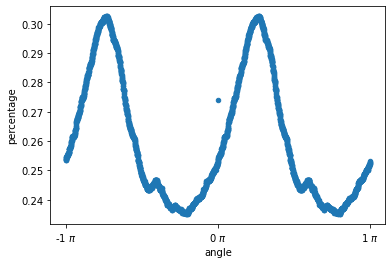

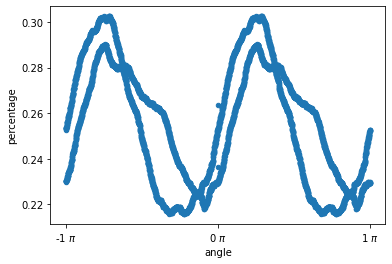

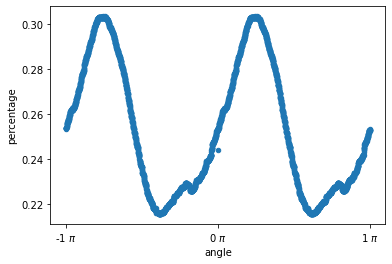

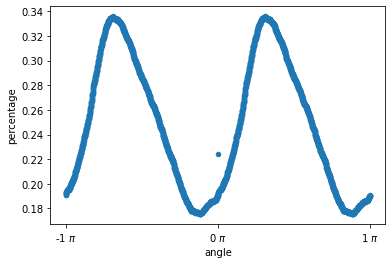

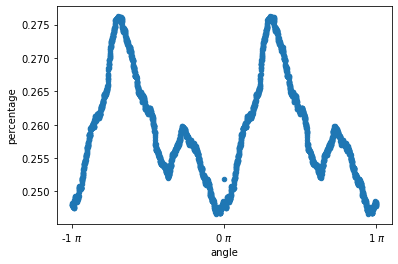

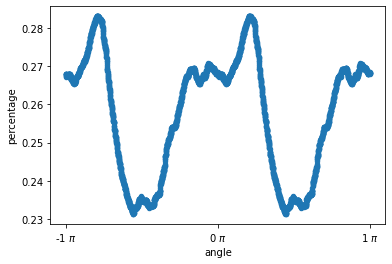

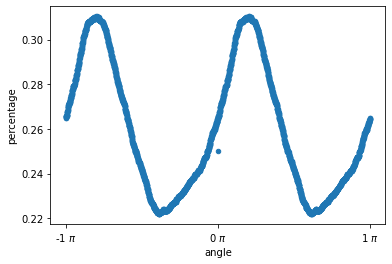

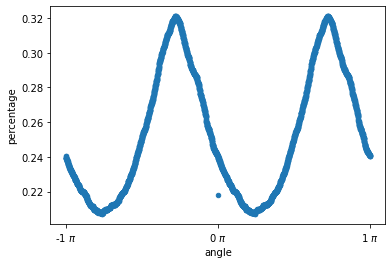

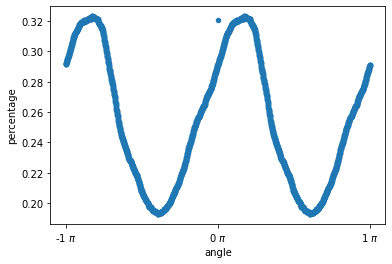

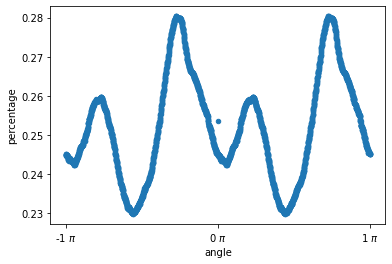

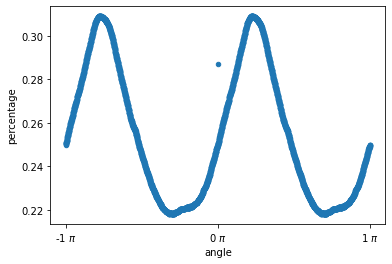

In [131]:
df["percentage"] = df["violated_constraints"] / df["total_constraints"]
print(df["percentage"].max())
axs = df.groupby("total_constraints").plot(x="angle",y="percentage",kind="scatter")

for ax in axs: 
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
print(df["total_constraints"].unique())

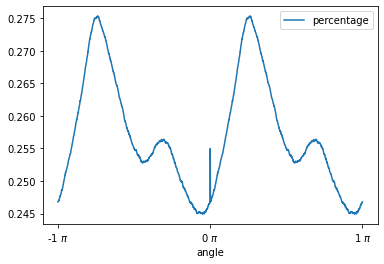

In [130]:
m = df.groupby("angle")["percentage"].mean()
m = m.reset_index()
ax = m.plot(x="angle",y="percentage",kind="line")
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
